In [ ]:
import numpy
import pandas
import tensorflow
import keras
from matplotlib import pyplot
import seaborn
import itertools
import pathlib
from gnn.gnn import GNN

%matplotlib inline

In [42]:
# CLASSIFIER PARAMETERS
my_vars = ['petallength', 'petalwidth']
class_col = 'flower'
my_class = 'Iris-virginica' # 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
my_loss = 'mse' # 'mse', 'binary_crossentropy'
my_metrics = ['Accuracy'] # 'Accuracy', 'Precision', 'Recall'
lr = 0.01 # 0.01, 0.001
my_epochs = 5000
validation_split = 0.15 # 0.25, 0.33

# SELECTION FROM IRIS DATAFRAME
my_vars_w_class = my_vars.copy()
my_vars_w_class.append(class_col)

In [43]:
# BUILD PATH TO DATA USING PATHLIB
this_folder = pathlib.Path.cwd()
data_folder = this_folder.parent.parent
path_to_iris = data_folder / 'datasets' / 'iris.data'

iris = pandas.read_csv(path_to_iris, sep=',', decimal='.')
iris = iris[my_vars_w_class]
iris

,petallength,petalwidth,flower
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


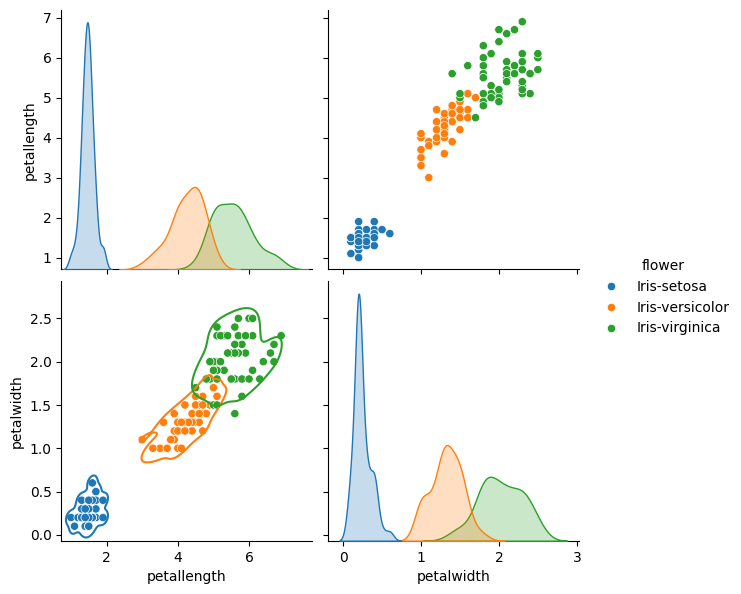

In [44]:
g = seaborn.pairplot(iris, hue='flower', height=3, diag_kind='kde')
_ = g.map_lower(seaborn.kdeplot, levels=1, color=".2")

In [45]:
# PREPARING Xn and Yn
X = iris[my_vars].to_numpy()
Y = (iris['flower'] == my_class).astype(int).to_numpy()[:, numpy.newaxis]

In [46]:
# BUILDING THE MODEL WITH THE SEQUENTIAL API
# my_net = keras.Sequential()
inputs = keras.Input(shape=(len(my_vars), ))
outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
model_name = f'{my_class}_classifier'
my_net = keras.Model(inputs=inputs, outputs=outputs, name=model_name)
my_net.summary()

Model: "Iris-virginica_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# TRAINING THE MODEL
# optimizer = tensorflow.keras.optimizers.RMSProp(learning_rate=lr)
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr)
my_net.compile(optimizer=optimizer, loss=my_loss, metrics=my_metrics)
es_val = tensorflow.keras.callbacks.EarlyStopping(monitor='val_precision', mode='max', patience=200)
es_train = tensorflow.keras.callbacks.EarlyStopping(monitor='precision', mode='max', patience=100)
history = my_net.fit(X, Y, batch_size=X.shape[0], epochs=my_epochs, validation_split=validation_split, verbose=1, callbacks=[es_val, es_train])

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - Accuracy: 0.2126 - loss: 0.6743 - val_Accuracy: 1.0000 - val_loss: 1.0406e-05
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - Accuracy: 0.2126 - loss: 0.6716 - val_Accuracy: 1.0000 - val_loss: 1.2257e-05
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - Accuracy: 0.2126 - loss: 0.6688 - val_Accuracy: 1.0000 - val_loss: 1.4439e-05


c:\Users\User\miniconda3\envs\infnet-nn-v2\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_precision` which is not available. Available metrics are: Accuracy,loss,val_Accuracy,val_loss
  current = self.get_monitor_value(logs)
c:\Users\User\miniconda3\envs\infnet-nn-v2\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `precision` which is not available. Available metrics are: Accuracy,loss,val_Accuracy,val_loss
  current = self.get_monitor_value(logs)


Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - Accuracy: 0.2126 - loss: 0.6660 - val_Accuracy: 1.0000 - val_loss: 1.7015e-05
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - Accuracy: 0.2126 - loss: 0.6631 - val_Accuracy: 1.0000 - val_loss: 2.0057e-05
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - Accuracy: 0.2126 - loss: 0.6602 - val_Accuracy: 1.0000 - val_loss: 2.3651e-05
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - Accuracy: 0.2126 - loss: 0.6571 - val_Accuracy: 1.0000 - val_loss: 2.7900e-05
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - Accuracy: 0.2126 - loss: 0.6540 - val_Accuracy: 1.0000 - val_loss: 3.2930e-05
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - Accuracy: 0.2126 - loss: 0.6508 - val_Accuracy: 1.0000 - val_loss: 3.8887e-05
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - Accuracy: 0.2126 - loss: 0.6475 - val_Accuracy: 1.0000 - val_loss: 4.5948e-05
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - Accuracy: 0.2126 - loss: 

# PLOT RESULTS

In [48]:
# CLASS COLOR GRID & CLASS EVALUATION
grid_n_points = 100
class_threshold = 0.5
little_delta = 0.1


In [49]:
x0_grid = numpy.linspace(X[:, 0].min(), X[:, 0].max(), grid_n_points)
x1_grid = numpy.linspace(X[:, 1].min(), X[:, 1].max(), grid_n_points)
X_g = numpy.array(list(itertools.product(x0_grid, x1_grid)))
Y_g = my_net.predict(X_g)
Y_est = (my_net.predict(X) > class_threshold).astype(int)
t_error, t_precision = my_net.evaluate(X, Y, verbose=0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


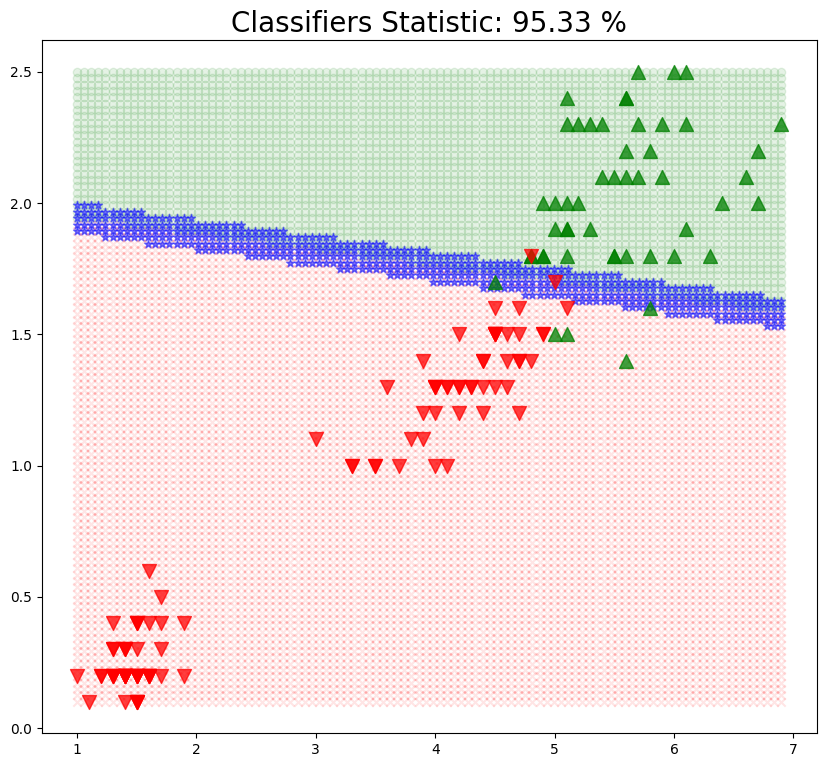

In [50]:
# CLASSIFICATION FIGURE
fig = pyplot.figure(figsize=(10, 9))
ax = fig.add_subplot(111)
# PLOT CLASS REGION
ix_class_region = Y_g.reshape(-1) > class_threshold
ix_class_points = Y.reshape(-1) == 1
ix_surface = (Y_g.reshape(-1) >= class_threshold - little_delta) &  (Y_g.reshape(-1) <= class_threshold + little_delta)
_ = ax.scatter(X_g[ix_class_region, 0], X_g[ix_class_region, 1], marker='o', color='green', alpha=0.1)
_ = ax.scatter(X_g[~ix_class_region, 0], X_g[~ix_class_region, 1], marker='x', color='red', alpha=0.1)
_ = ax.scatter(X_g[ix_surface, 0], X_g[ix_surface, 1], marker='*', color='blue', alpha=0.5)
_ = ax.scatter(X[ix_class_points, 0], X[ix_class_points, 1], marker='^', color='green', alpha=0.75, s=100)
_ = ax.scatter(X[~ix_class_points, 0], X[~ix_class_points, 1], marker='v', color='red', alpha=0.75, s=100)
_ = ax.set_title('Classifiers {}: {:.2f} %'.format('Statistic', 100*t_precision), size=20)

In [51]:
numpy.unique(Y_g)

array([4.4374715e-06, 4.5471934e-06, 4.6596278e-06, ..., 9.9777240e-01,
       9.9782604e-01, 9.9787837e-01], dtype=float32)